In [4]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import seaborn as sns

OSError: ignored

In [2]:
sampleRate = 44100
frequency0 = 300
frequency1 = 302
duration = 10

(0.0, 1.0)

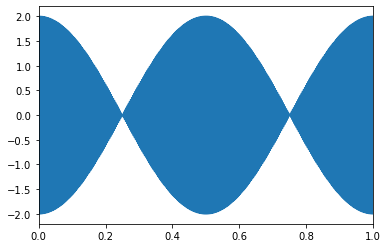

In [ ]:
t = np.linspace(0, duration, sampleRate * duration)  #  Produces a 5 second Audio-File
y0 = np.sin(frequency0 * 2 * np.pi * t)  #  Has frequency of 440Hz
y1 = np.sin(frequency1 * 2 * np.pi * t)
plt.plot(t,y0+y1)
plt.xlim(0,1)

In [ ]:
response = sd.playrec(data=y0+y1,channels=1,samplerate=sampleRate)

In [ ]:
order =5
sampling_freq = sampleRate
cutoff_freq = 2
sampling_duration = duration
number_of_samples = sampling_freq * sampling_duration
time = np.linspace(0, sampling_duration, number_of_samples, endpoint=False)

<ipython-input-11-2104be0ecba7>:11: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(t, f, np.log(Sxx), cmap='plasma')


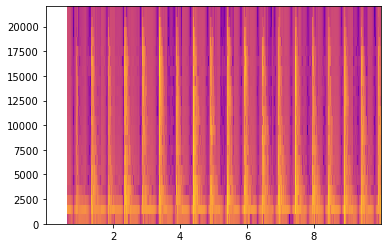

In [ ]:
windur = 0.001
winsamp = int(windur*sampleRate)

f, t, Sxx = signal.spectrogram(response.flatten(),
                               fs = sampleRate,
                               window = 'hamming',
                               nperseg = winsamp,
                               noverlap = winsamp/2
                              )

plt.pcolormesh(t, f, np.log(Sxx), cmap='plasma') 
# plt.ylim(0,2500)

In [ ]:
%matplotlib qt
hfig = plt.figure()

<Figure size 1280x960 with 0 Axes>

In [ ]:
plt.cla()

In [ ]:
plt.pcolormesh(t, f, np.log(Sxx), cmap='plasma') 

<ipython-input-13-c271e7dd4525>:1: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(t, f, np.log(Sxx), cmap='plasma')


In [ ]:
pts = np.asarray(plt.ginput(n=0,timeout=0,show_clicks=True))

In [ ]:
response_time = pts[:,0]

In [ ]:
plt.cla()

In [ ]:
xtime = np.linspace(0, duration, sampleRate * duration) 
plt.plot(xtime,np.abs(signal.hilbert(y0+y1)),color = 'black')

In [ ]:
pts = np.asarray(plt.ginput(n=0,timeout=0,show_clicks=True))

In [ ]:
beat_time = pts[:,0]

In [ ]:
pre_response = []
for b in beat_time:
    n = len(response_time[response_time<b])
    if n == 0:
        pre_response.append(np.NaN)
    if n>0:
        pre_response.append(np.max(response_time[response_time<b])-b)
        
post_response = []
for b in beat_time:
    n = len(response_time[response_time>b])
    if n == 0:
        post_response.append(np.NaN)
    if n>0:
        post_response.append(np.min(response_time[response_time>b])-b)


In [ ]:
plt.close(hfig)

In [ ]:
%matplotlib inline

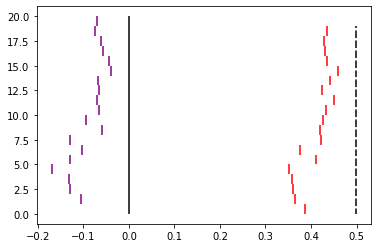

In [ ]:
[plt.vlines(0,i,i+1,color = 'black') for i,r in enumerate(beat_time)];
[plt.vlines(np.mean(np.diff(beat_time)),i,i+1,color = 'black',linestyle='--') for i,r in enumerate(beat_time[1:])];
[plt.vlines(r,i,i+1,color = 'purple') for i,r in enumerate(pre_response)];
[plt.vlines(r,i,i+1,color = 'red') for i,r in enumerate(post_response)];

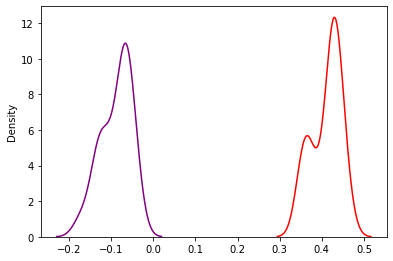

In [ ]:
hfig = plt.figure()
ax = hfig.add_axes([0.1,0.1,0.8,0.8])
sns.kdeplot(x = pre_response,ax = ax,color = 'purple')
sns.kdeplot(x = post_response,ax = ax,color = 'red')

In [ ]:
sd.query_devices()

> 0 Built-in Microphone, Core Audio (2 in, 0 out)
< 1 Built-in Output, Core Audio (0 in, 2 out)
  2 ZoomAudioDevice, Core Audio (2 in, 2 out)

In [ ]:
duration = 3
xtime = np.linspace(0, duration, sampleRate * duration) 


In [ ]:
myrecording = sd.rec(int(duration * sampleRate),samplerate = sampleRate,channels=1)
sd.wait()

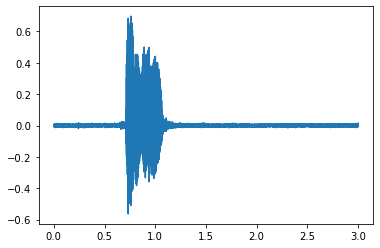

In [ ]:
plt.plot(xtime,myrecording)

In [ ]:
sd.play(myrecording,sampleRate)

In [ ]:
#parameters for spectrogram
windur = 0.01
winsamp = int(windur*sampleRate)

(0.0, 15000.0)

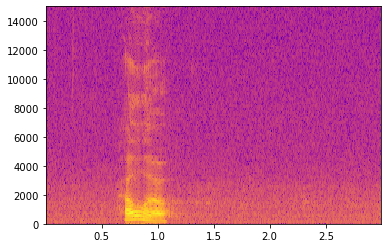

In [ ]:
f, t, Sxx = signal.spectrogram(myrecording.flatten(),
                               fs = sampleRate,
                               window = 'hamming',
                               nperseg = winsamp,
                               noverlap = winsamp/2
                              )

plt.pcolormesh(t, f, np.log(Sxx), cmap='plasma') 
plt.ylim(0,15000)

In [ ]:
response_mat = []
for i in np.arange(10):
    response = sd.playrec(data=myrecording,channels=1,samplerate=sampleRate)
    sd.wait()
    response_mat.append(response.flatten())

In [ ]:
f, t, Sxx = signal.spectrogram(myrecording.flatten(),
                               fs = sampleRate,
                               window = 'hamming',
                               nperseg = winsamp,
                               noverlap = winsamp/2
                              )
call_env = np.sum(Sxx,0)

In [ ]:
response_env = []
for r in np.asarray(response_mat):
    f, t, Sxx = signal.spectrogram(r.flatten(),
                               fs = sampleRate,
                               window = 'hamming',
                               nperseg = winsamp,
                               noverlap = winsamp/2
                              )
    response_env.append(np.sum(Sxx,0))
response_env = np.asarray(response_env).T
# plt.pcolormesh(t, f, np.log(Sxx), cmap='plasma') 
# plt.ylim(0,15000)

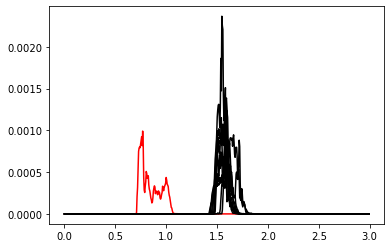

In [ ]:
plt.plot(t,call_env,color = 'red')
plt.plot(t,response_env,color = 'black');

    

In [ ]:
thresh = 0.0001
response_time = []
for r in response_env.T:
    response_time.append(np.min(t[r>thresh]))
response_time = np.asarray(response_time).T

call_time = np.min(t[call_env>thresh])

In [ ]:
response_latency = np.asarray([r - call_time for r in response_time])

mean response latency = 0.7627256235827665sec


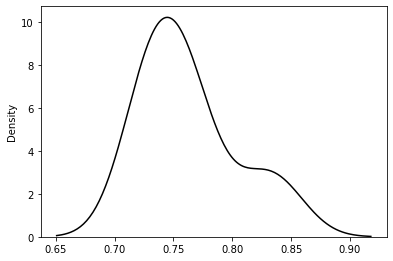

In [ ]:
hfig = plt.figure()
ax = hfig.add_axes([0.1,0.1,0.8,0.8])
sns.kdeplot(x = response_latency,ax = ax,color = 'black');

print('mean response latency = ' + str(np.mean(response_latency)) + 'sec')

In [ ]:
padlen = int(np.mean(response_latency)*sampleRate)

In [ ]:
call = myrecording
jamming_call = np.concatenate([np.zeros(padlen),myrecording[0:-padlen].flatten()])

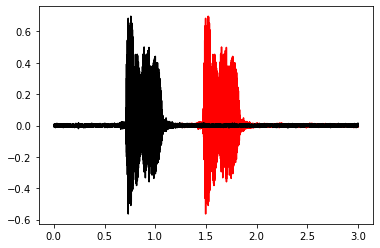

In [ ]:
plt.plot(xtime,jamming_call,color = 'red')
plt.plot(xtime,call,color = 'black')

In [ ]:
jamming_trial = jamming_call + call
call_trial = call

In [ ]:
plt.plot(xtime,jamming_trial)